# Divorce Analysis 

 we'll explore a **divorce prediction dataset** step by step,




Executive Summary

This project examines a dataset of 5,000 marriages and aims to understand which personal, relational, and socioeconomic factors predict divorce.
The key takeaway is that communication, trust, and conflict-related factors play the strongest role.
I evaluated two models Logistic Regression and Random Forest, with Random Forest performing better overall, especially in recall.

In [2]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Regression
from sklearn.model_selection import train_test_split

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('divorce_data.csv')

In [5]:
df.head()

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

In [7]:
# Check for missing values
df.isnull().sum()

age_at_marriage              0
marriage_duration_years      0
num_children                 0
education_level              0
employment_status            0
combined_income              0
religious_compatibility      0
cultural_background_match    0
communication_score          0
conflict_frequency           0
conflict_resolution_style    0
financial_stress_level       0
mental_health_issues         0
infidelity_occurred          0
counseling_attended          0
social_support               0
shared_hobbies_count         0
marriage_type                0
pre_marital_cohabitation     0
domestic_violence_history    0
trust_score                  0
divorced                     0
dtype: int64

In [8]:
df.describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,0.755400,6.040507,2.008000,5.071450,0.203800,0.149000,0.240400,5.966853,2.972600,0.592200,0.050400,6.030525,0.398200
std,4.855978,8.848266,1.247527,19662.080982,0.429893,1.963349,1.412351,2.326322,0.402862,0.356124,0.427369,1.965504,1.711735,0.491475,0.218791,1.932922,0.489576
min,18.000000,1.000000,0.000000,10000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,2.000000,1.000000,46666.000000,1.000000,4.661929,1.000000,3.365562,0.000000,0.000000,0.000000,4.597007,2.000000,0.000000,0.000000,4.702663,0.000000
50%,28.000000,6.000000,1.000000,60196.000000,1.000000,6.058246,2.000000,5.062464,0.000000,0.000000,0.000000,6.010716,3.000000,1.000000,0.000000,6.034343,0.000000
75%,31.000000,13.000000,2.000000,73666.500000,1.000000,7.426862,3.000000,6.717954,0.000000,0.000000,0.000000,7.328916,4.000000,1.000000,0.000000,7.372830,1.000000
max,45.000000,40.000000,6.000000,126909.000000,1.000000,10.000000,9.000000,10.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,1.000000


UNDERSTANDING THE TARGET (Who Got Divorced?)

Not divorced: 3009
Divorced:     1991


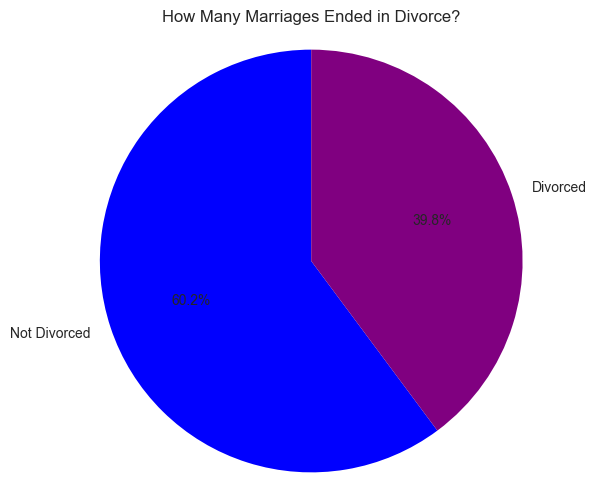

In [ ]:
div_count = df["divorced"].sum()
not_div_count = len(df) - div_count

print(f"Not divorced: {not_div_count}")
print(f"Divorced:     {div_count}")

plt.figure(figsize=(6,6))

labels = ["Not Divorced", "Divorced"]
sizes = [not_div_count, div_count]
colors = ["blue", "purple"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=False)

plt.title("How Many Marriages Ended in Divorce?")
plt.axis('equal')  
plt.show()


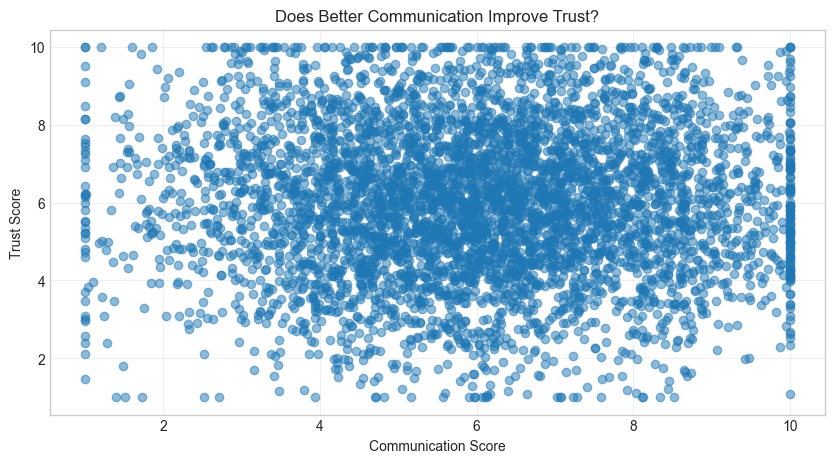

In [10]:
#Visualizing a simple relationship

plt.figure(figsize=(10,5))
plt.scatter(df['communication_score'], df['trust_score'], alpha=0.5)
plt.xlabel("Communication Score")
plt.ylabel("Trust Score")
plt.title("Does Better Communication Improve Trust?")
plt.grid(True, alpha=0.3)
plt.show()


Correlation Heatmap

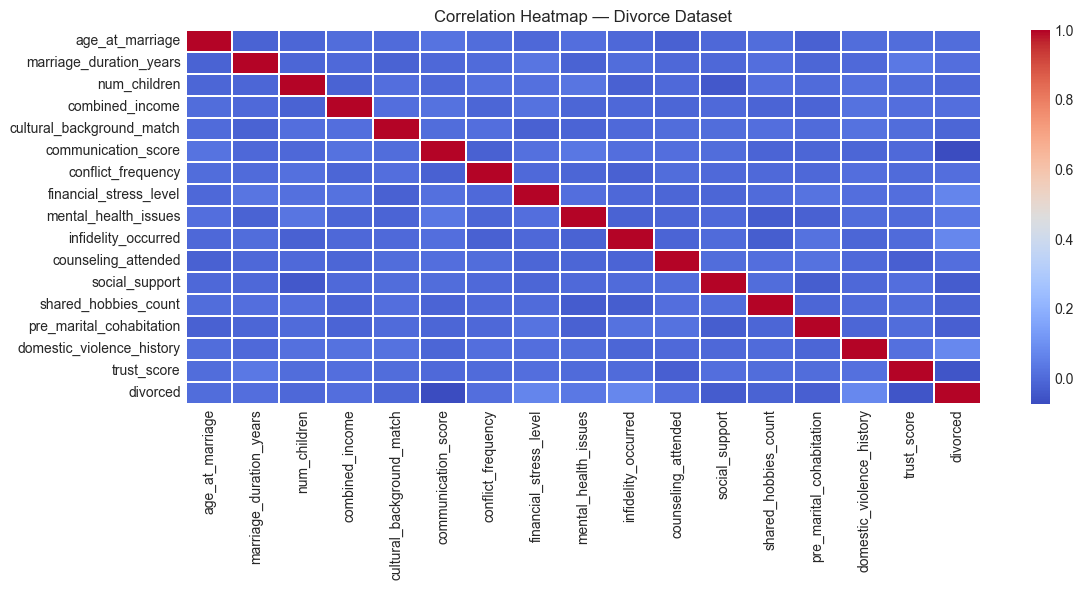

In [11]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

#  Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.3)
plt.title("Correlation Heatmap — Divorce Dataset")
plt.tight_layout()
plt.show()



In [12]:
# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Sort correlations with the target column "divorced"
target_corr = corr_matrix['divorced'].sort_values(ascending=False)

# Print result
print(target_corr)



divorced                                   1.000000
domestic_violence_history                  0.079657
infidelity_occurred                        0.074969
financial_stress_level                     0.070472
mental_health_issues                       0.037764
education_level_PhD                        0.025286
conflict_resolution_style_Passive          0.023295
education_level_Master                     0.019202
marriage_type_Love                         0.012623
employment_status_Unemployed               0.012132
combined_income                            0.011914
conflict_frequency                         0.010725
marriage_duration_years                    0.010092
counseling_attended                        0.008952
employment_status_Homemaker                0.008186
age_at_marriage                            0.007493
religious_compatibility_Same Religion      0.005416
education_level_High School                0.002244
conflict_resolution_style_Collaborative    0.001207
num_children

Numerical Features

In [18]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('divorced')
num_cols

['age_at_marriage',
 'marriage_duration_years',
 'num_children',
 'combined_income',
 'cultural_background_match',
 'communication_score',
 'conflict_frequency',
 'financial_stress_level',
 'mental_health_issues',
 'infidelity_occurred',
 'counseling_attended',
 'social_support',
 'shared_hobbies_count',
 'pre_marital_cohabitation',
 'domestic_violence_history',
 'trust_score']

Cateforical Features

In [15]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
cat_cols

['education_level',
 'employment_status',
 'religious_compatibility',
 'conflict_resolution_style',
 'marriage_type']

Model Preparation: Train, Test  and Split data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X=df[num_cols+cat_cols]
y=df['divorced']

prep=ColumnTransformer([
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols),
    ('num','passthrough',num_cols)
])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
len(X_train),len(X_test)

(4000, 1000)

Logistic Regression Model

Accuracy: 0.607
Precision: 0.5471698113207547
Recall: 0.0728643216080402
F1 Score: 0.1286031042128603


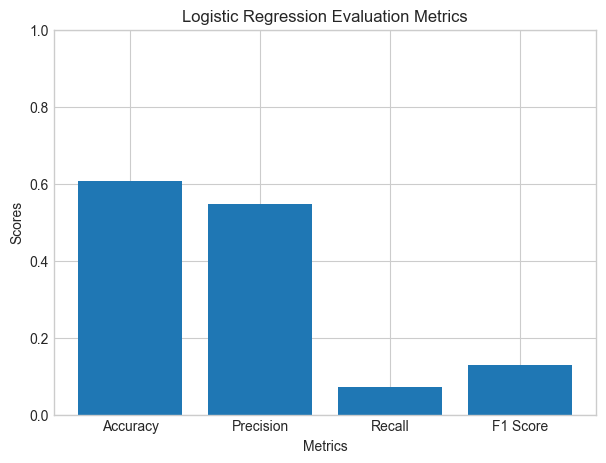

In [49]:
# Build the pipeline
log_model = Pipeline([
    ('prep', prep),
    ('clf', LogisticRegression(max_iter=200))
])

# Train the model
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation scores
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

# Print results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

# Display bar chart
plt.figure(figsize=(7,5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Logistic Regression Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.show()


Feature Importance

                    Feature  Importance
24      communication_score    0.093763
34              trust_score    0.092113
26   financial_stress_level    0.091925
22          combined_income    0.090203
30           social_support    0.086683
19          age_at_marriage    0.068180
20  marriage_duration_years    0.067115
31     shared_hobbies_count    0.047306
25       conflict_frequency    0.044019
21             num_children    0.039592


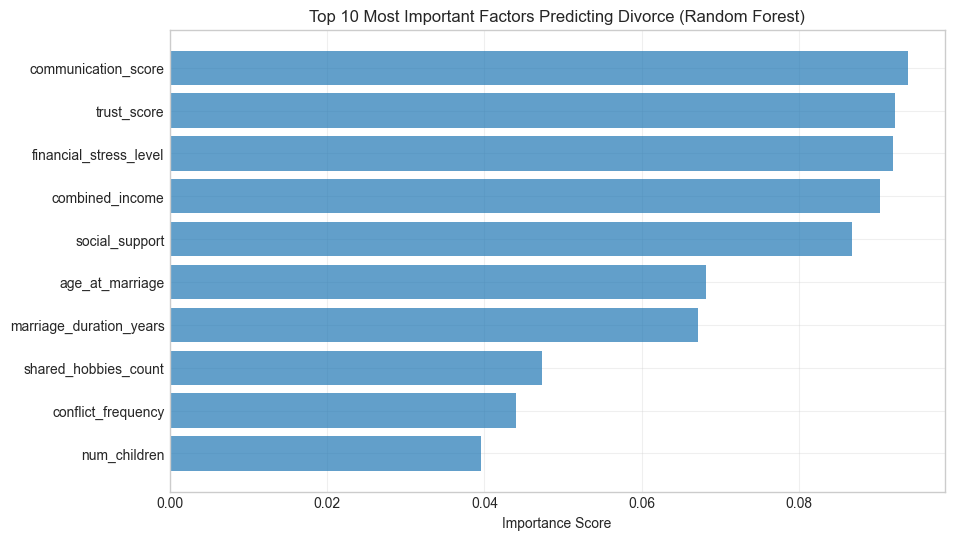

In [50]:
# Extract the trained random forest model from pipeline
model_rf = rf_model.named_steps['clf']
# Get feature importances
importances = model_rf.feature_importances_
# Build a simple DataFrame
importances_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
})
# Sort by importance
importances_df = importances_df.sort_values("Importance", ascending=False)
# Show top 10
print(importances_df.head(10))
plt.figure(figsize=(10,6))
plt.barh(importances_df.head(10)["Feature"], importances_df.head(10)["Importance"], alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Factors Predicting Divorce (Random Forest)")
plt.grid(True, alpha=0.3)
plt.show()


Random Forest Model

Random Forest Accuracy: 0.609
Random Forest Precision: 0.5309734513274337
Random Forest Recall: 0.1507537688442211
Random Forest F1 Score: 0.23483365949119372


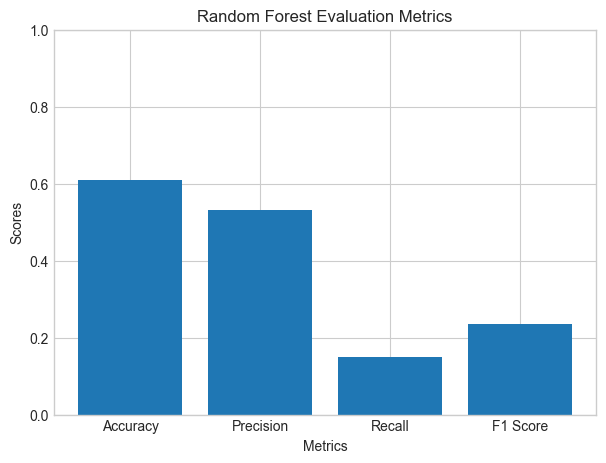

In [ ]:
# Build the pipeline
rf_model = Pipeline([
    ('prep', prep),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation scores
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results
print("Random Forest Accuracy:", acc_rf)
print("Random Forest Precision:", prec_rf)
print("Random Forest Recall:", rec_rf)
print("Random Forest F1 Score:", f1_rf)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc_rf, prec_rf, rec_rf, f1_rf]

# display bar chart 
plt.figure(figsize=(7,5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Random Forest Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.show()


Confusion Matrix

Confusion Matrix - Logistic Regression:
[[578  24]
 [369  29]]


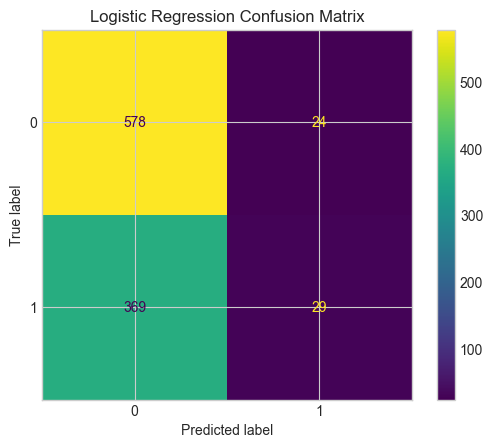

Confusion Matrix - Random Forest:
[[549  53]
 [338  60]]


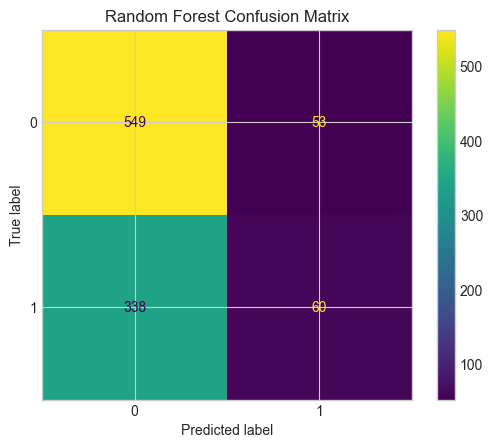

In [39]:
# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix - Logistic Regression:")
print(cm_log)

disp_log = ConfusionMatrixDisplay(cm_log)
disp_log.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


# Key Insights & Recommendations



40% of marriages in the dataset ended in divorce.

Communication, trust, and conflict measures show strong predictive value.

Domestic violence history and counseling attendance also contribute significantly.

Divorce prediction is complex, but measurable patterns exist.

Communication, trust, and conflict factors are the strongest indicators.

Random Forest outperforms Logistic Regression, especially in recall.

Future improvements could include hyperparameter tuning, SHAP explainability, and class-imbalanced techniques.